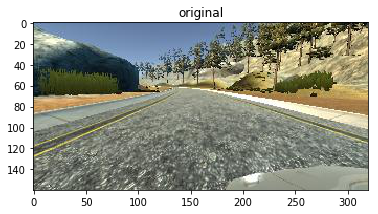

In [1]:
from os import listdir
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#
# Open an image
#
image_path = 'data/IMG/' + listdir('data/IMG')[0]
image = cv2.imread(image_path)

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb)
plt.title('original')
plt.show()



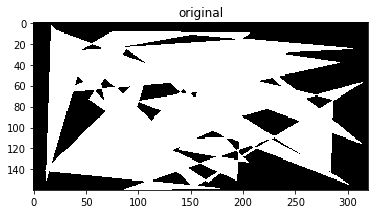

In [2]:
height, width = image.shape[:2]

#
# First randomly determine a number of shadows
# to apply to the image.
# a minimum of 1 shadow, max of 5
#
number_of_shadows = np.random.randint(1, 6)

#
# Make our shadows within the image
#
list_of_shadows = []
for index in range(number_of_shadows):
    #
    # The vertices in this shadow
    #
    shadow_vertices = []
    
    #
    # Shadows are at least a triangle but
    # could be a polygon with up to 25 points
    #
    number_of_points = np.random.randint(3, 26)
    
    #
    # Randomly determine the polygon points
    #    
    for _ in range(number_of_points):
        random_point_x = width * np.random.uniform()
        random_point_y = height * np.random.uniform()
        shadow_vertices.append(( random_point_x, random_point_y))

    #
    # add to the list of all shadows applied to the image
    #
    list_of_shadows.append( np.array([shadow_vertices], dtype=np.int32))

#
# Create a mask with the same dimensions
# as the original image
#
mask = np.zeros((height, width))

#
# On the mask, use opencv fillPoly()
# to fill all the shadow polygon
# area with white 
#
for shadow in list_of_shadows:
    cv2.fillPoly(mask, shadow, 255)

#
# Visualize the mask
plt.imshow(mask, cmap='gray')
plt.title('original')
plt.show()

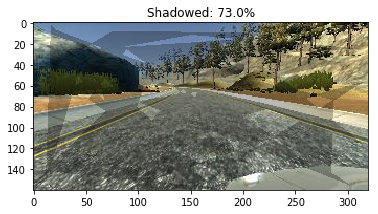

In [4]:
#
# Convert to HSV color space and 
# grab the V channel
#
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
v_channel = hsv[:, :, 2]

#
# Randomly choose a darkness of the shadows
# between .45 and .75
# Lower numbers result in darker shadows
#
random_darkness = np.random.randint(45, 75) / 100.0

#
# modify the V channel wherever the mask is white
#
v_channel[mask==255] = v_channel[mask==255] * random_darkness

#
# Add the modifed V channel back
# 
hsv[:, :, 2] = v_channel

#
# Convert back to RGB
#
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB) 

#
# plot the result
#
plt.imshow(rgb)
plt.title("Shadowed: {}%".format(random_darkness * 100))
plt.show()
